In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/jayasakthibalajig/Sakthi/AI T&E/data.csv')

In [3]:
df.head()

,label,age,gender,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,24,49,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,55,49,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,17,49,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,76,31,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,31,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.tail()

,label,age,gender,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6576,43,40,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6577,32,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6578,70,40,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6579,59,48,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6580,32,48,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df.size

138201

In [6]:
df.shape

(6581, 21)

In [7]:
df.columns

Index(['label', 'age', 'gender', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [8]:
df['label'].unique()

array([ 24,  55,  17,  76,   2,  32,   5,  38,  50,  44,  88,  87,   7,
        84,  13,  27,  82,  59,  92,  97,  80,  36,   3,   6,  58,  63,
        95,  86,  29,  16,  22,  41,  35,  57,  94,  42,  64,  51,  96,
        79,  61,  31,  89,  45,  93,  46,  77,  15,  25,  98,  83,  10,
         9,  26,  68,  73,  74,  65,  66,  91,   4,  60,  99,  43,  69,
        70,  23,  20,  18,  40,  34,  37,   8, 100,  21,   0,  81,  49,
        53,  71,  90,  52,  56,   1,  78,  28,  67,  47,  54,  72,  33,
        62,  19,  39,  14,  85,  75,  48,  11,  12,  30])

In [9]:
df.dtypes

label          int64
age            int64
gender         int64
Action         int64
Adventure      int64
Animation      int64
Children       int64
Comedy         int64
Crime          int64
Documentary    int64
Drama          int64
Fantasy        int64
Film-Noir      int64
Horror         int64
Musical        int64
Mystery        int64
Romance        int64
Sci-Fi         int64
Thriller       int64
War            int64
Western        int64
dtype: object

In [10]:
df['label'].value_counts()

label
32    431
41    291
44    284
88    276
50    276
     ... 
79      2
74      1
48      1
75      1
30      1
Name: count, Length: 101, dtype: int64

<Axes: >

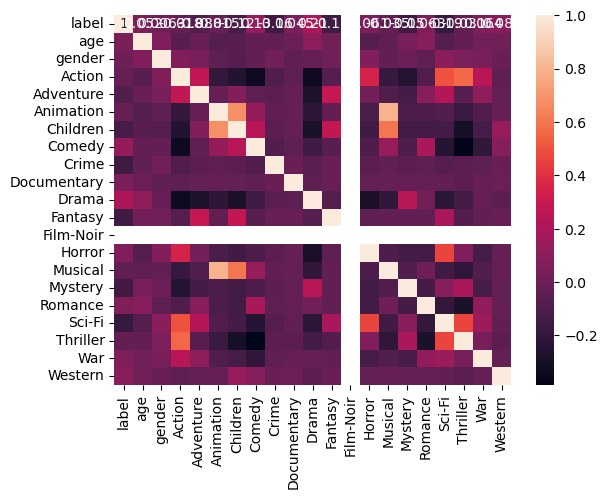

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
features = df[['age', 'gender', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western']]
target = df['label']
labels = df['label']

In [13]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [14]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  62.56643887623387
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.53      1.00      0.69        21
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00         9
           5       0.20      1.00      0.33        18
           6       0.52      1.00      0.68        13
           7       1.00      1.00      1.00        62
           8       0.00      0.00      0.00         1
           9       0.39      1.00      0.57        15
          10       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       1.00      1.00      1.00        22
          16       0.54      1.00      0.70        29
          17       0.00      0.00

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [18]:
score

array([0.6309795 , 0.63069909, 0.63069909, 0.63297872, 0.63449848])

SVM

In [19]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.768413059984814
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.60      1.00      0.75        21
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00         9
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        62
           8       1.00      1.00      1.00         1
           9       0.54      1.00      0.70        15
          10       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        29
          17       0.33      0.82      0.47

In [20]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.2080486 , 0.21048632, 0.19908815, 0.23404255, 0.193769  ])

Naive bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.7593014426727411
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.61      0.95      0.74        21
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00         9
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        62
           8       1.00      1.00      1.00         1
           9       0.80      0.53      0.64        15
          10       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        29
          17       0.34      0.82 

In [22]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.76461655, 0.76139818, 0.74164134, 0.76975684, 0.75607903])

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.7061503416856492
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.51      1.00      0.68        21
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00         9
           5       0.72      1.00      0.84        18
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        62
           8       0.00      0.00      0.00         1
           9       0.70      0.47      0.56        15
          10       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       1.00      1.00      1.00        22
          16       0.72      0.97      0.82        29
          17       0.33   

In [24]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.71678056, 0.70440729, 0.73556231, 0.72796353, 0.72340426])

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.7479119210326499
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2
           2       0.65      0.62      0.63        21
           3       0.30      0.22      0.25        32
           4       0.00      0.00      0.00         9
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        62
           8       1.00      1.00      1.00         1
           9       0.78      0.47      0.58        15
          10       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        29
          17       0.31      0.47      0.37

In [26]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.74867122, 0.7393617 , 0.74620061, 0.74696049, 0.75607903])

### Saving trained Random Forest model

In [27]:
# import pickle
# # Dump the trained Naive Bayes classifier with Pickle
# RF_pkl_filename = '../models/RandomForest.pkl'
# # Open the file to save as pkl file
# RF_Model_pkl = open(RF_pkl_filename, 'wb')
# pickle.dump(RF, RF_Model_pkl)
# # Close the pickle instances
# RF_Model_pkl.close()

# XGBoost

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.6408504176157934
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.58      1.00      0.74        21
           3       0.23      0.41      0.29        32
           4       0.00      0.00      0.00         9
           5       0.90      1.00      0.95        18
           6       0.93      1.00      0.96        13
           7       0.95      1.00      0.98        62
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       0.43      1.00      0.60        22
          16       0.52      1.00      0.68        29
          17       0.00      0.00     

In [30]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([       nan,        nan, 0.74924012, 0.76215805,        nan])

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

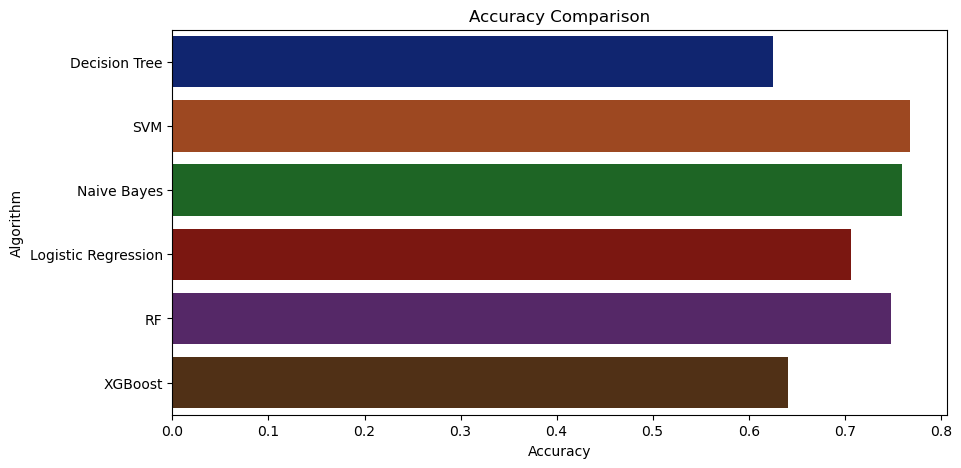

In [31]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [32]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.6256643887623387
SVM --> 0.768413059984814
Naive Bayes --> 0.7593014426727411
Logistic Regression --> 0.7061503416856492
RF --> 0.7479119210326499
XGBoost --> 0.6408504176157934
